Capstone Project- The Battle of Neighborhoods

Introduction

New Delhi is an urban district located in the city of Delhi. New Delhi serves as the capital of India and the seat of all three branches of the Government of 
India. The city itself has a population of 257,803. New Delhi is a cosmopolitan city due to the multi-ethnic and multi-cultural presence of the vast Indian bureaucracy and political system. The National Capital Region is a much larger entity comprising the entire NCT along with adjoining districts in neighboring states. The official language of New Delhi and the one that is most widely spoken is Hindi. However, English is also spoken as a formal language within businesses and government agencies. New Delhi is the largest commercial city in northern India. It has an estimated net State Domestic 
Product (FY 2010) of ₹1,595 billion (US$22 billion) in nominal terms and ₹6,800 billion (US$95 billion) in PPP terms. As of 2013, the per capita income of Delhi was Rs. 230000, second highest in India after Goa. GSDP in Delhi at the current prices for 2012–13 is estimated at Rs 3.88 trillion (short scale) against Rs 3.11 trillion in 2011–12. Connaught Place, one of North India's largest commercial and financial centres, is located in the northern part of New Delhi.  
With its diverse culture, comes diverse food items. There are many restaurants in New Delhi City, each belonging to different categories like Chinese, Italian, French etc. So as part of this project, we will list and visualize all major parts of New Delhi City. 


Business Problems:

Questions that can be asked using the above mentioned datasets 
1) What places have the best restaurants in Delhi? 
2) What places have the worst restaurants in Delhi? 
3) What is best location in New Delhi City for Chinese Cuisine? 
4) Which all areas have less number of restaurant? 
5) Which areas have large number of Restaurants available in the locality of New Delhi Market? 


Data Requirements

New Delhi restaurants data that contains list Locality, restaurant name, rating along with their latitude and longitude. The data that we are going to need to help us make this project are: 
1) Data source: Zomato kaggel dataset: https://www.kaggle.com/shrutimehta/zomatorestaurants-data 
Description: This data set contains the required information and we will use this data set to explore various locality of New Delhi City. All the nearby places in each locality of new Delhi city will be listed and visualized.  
 
2) Data source: Foursquare API: https://developer.foursquare.com/ 
Description: By using this API we will get all the exact coordinates of the venues in each neighborhood. 


Approach

1) Collect data from the already prepared dataset of zomato kaggel dataset.

2) Mark all nearby neighborhoods with the help of Foursquare API.

3) Perform Data Filtering on the acquired random data.

4) Take an aggregate rating in order to solve the business problems.

5) List and Visualize the ranking of the restaurants according to the business problems.

IMPORT ALL THE LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder
print("All Libraries have been succesfully imported")

Solving environment: done

# All requested packages already installed.

All Libraries have been succesfully imported


READ THE ZOMATO RESTAURANT DATA FILE FROM THE CSV FILE

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/SayamDeb/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'New Delhi']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,18287358,Food Cloud,1,New Delhi,"Aaya Nagar, New Delhi",Aaya Nagar,"Aaya Nagar, New Delhi",0.000000,0.000000,Cuisine Varies,...,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,2
1,18216944,Burger.in,1,New Delhi,"84, Near Honda Showroom, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.196923,28.535382,Fast Food,...,Indian Rupees(Rs.),No,Yes,No,No,1,3.2,Orange,Average,46
2,313333,Days of the Raj,1,New Delhi,"81/3, 1st Floor, Qutub Residency, Adchini, New...",Adchini,"Adchini, New Delhi",77.197475,28.535493,"North Indian, Seafood, Continental",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,3.4,Orange,Average,45
3,18384127,Dilli Ka Dhaba,1,New Delhi,"66 A, Ground Floor, Sri Aurobindo Marg, Adchin...",Adchini,"Adchini, New Delhi",77.198033,28.537547,"South Indian, North Indian",...,Indian Rupees(Rs.),No,No,No,No,2,2.6,Orange,Average,11
4,582,Govardhan,1,New Delhi,"84, Adjacent Hero Motor Bike Showroom, Main Me...",Adchini,"Adchini, New Delhi",77.196924,28.535523,"South Indian, North Indian, Chinese",...,Indian Rupees(Rs.),No,Yes,No,No,2,3.4,Orange,Average,238


DATA CLEANING

REMOVE THE UNWANTED COLUMNS AND ROWS FROM THE DATASET

In [5]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [6]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [7]:
df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
1,Burger.in,Adchini,77.196923,28.535382,Fast Food,3.2,Average,46
2,Days of the Raj,Adchini,77.197475,28.535493,"North Indian, Seafood, Continental",3.4,Average,45
3,Dilli Ka Dhaba,Adchini,77.198033,28.537547,"South Indian, North Indian",2.6,Average,11
4,Govardhan,Adchini,77.196924,28.535523,"South Indian, North Indian, Chinese",3.4,Average,238
5,Mezbaan Grills,Adchini,77.198122,28.538134,Mughlai,3.1,Average,8


CREATE A MAP TO SHOW THE RESTAURANT CLUSTER

In [ ]:
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

NOTE: THE MAP MAY NOT BE VISIBLE IN THE GITHUB REPOSITORY

In [8]:
df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
1,Burger.in,Adchini,77.196923,28.535382,Fast Food,3.2,Average,46
2,Days of the Raj,Adchini,77.197475,28.535493,"North Indian, Seafood, Continental",3.4,Average,45
3,Dilli Ka Dhaba,Adchini,77.198033,28.537547,"South Indian, North Indian",2.6,Average,11
4,Govardhan,Adchini,77.196924,28.535523,"South Indian, North Indian, Chinese",3.4,Average,238
5,Mezbaan Grills,Adchini,77.198122,28.538134,Mughlai,3.1,Average,8


1) WHAT PLACES HAVE THE BEST RESTAURANTS IN NEW DELHI?

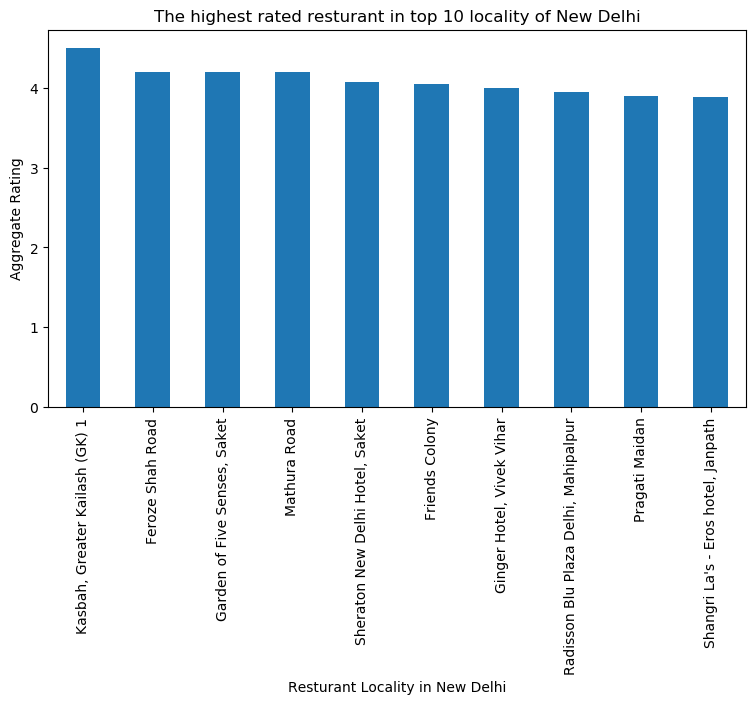

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

ANSWER: THE BEST RATED RESTAURANTS ARE AVAILABLE IN KASBAH, GREATER KAILASH(GK)

2) WHICH PLACES HAVE THE WORST RATED RESTAURANTS IN THE CITY OF NEW DELHI?

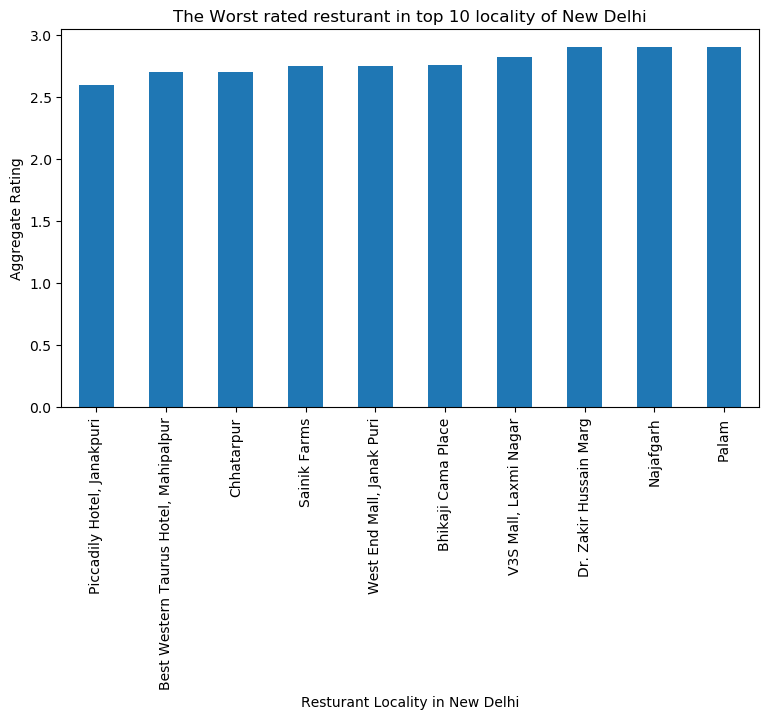

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

ANSWER: THE WORST RATED RESTAURANTS IN DELHI ARE IN PICCADILY HOTEL, JANAKPURI

3) WHERE ARE THE HIGHEST NUMBER OF RESTAURANTS AVAILABLE?

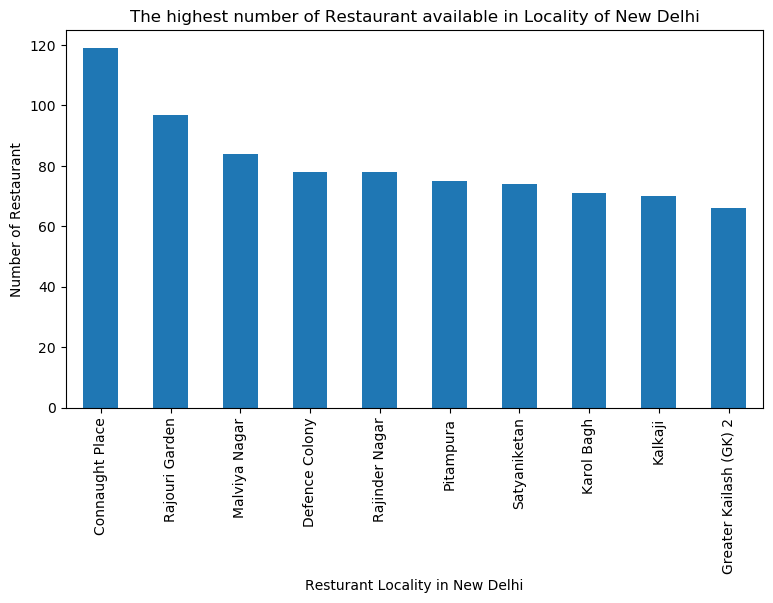

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

ANSWER:THE HIGHEST NUMBER OF RESTAURANTS ARE AVAILABLE IN CONNAUGHT PLACE

4) WHICH PLACE HAS THE LOWEST NUMBER OF RESTAURANTS?

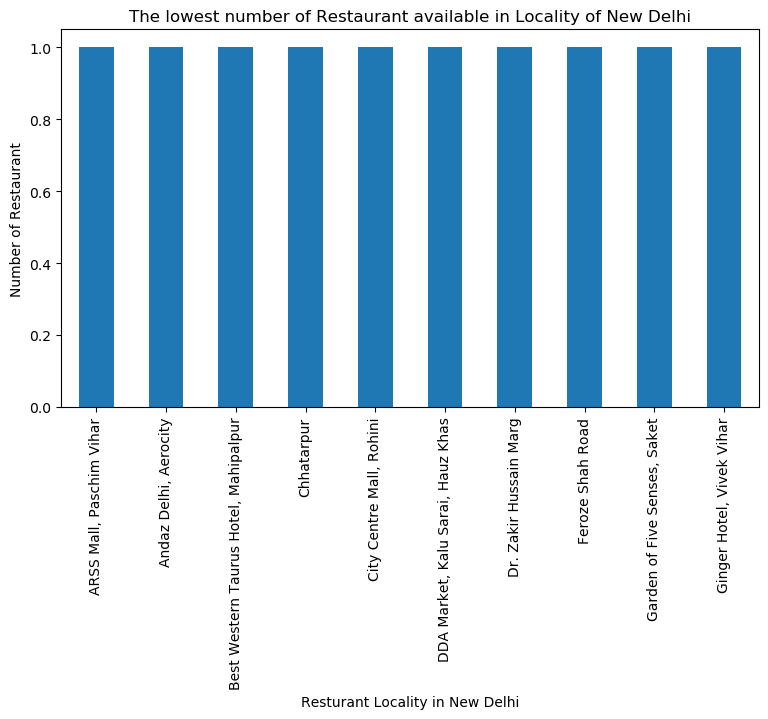

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()


ANSWER:THE LOWEST NUMBER OF RESTAURANTS ARE AVAILABLE IN 

5) WHAT ARE THE BEST LOCALITY FOR CHINESE RESTAURANTS IN NEW DELHI?

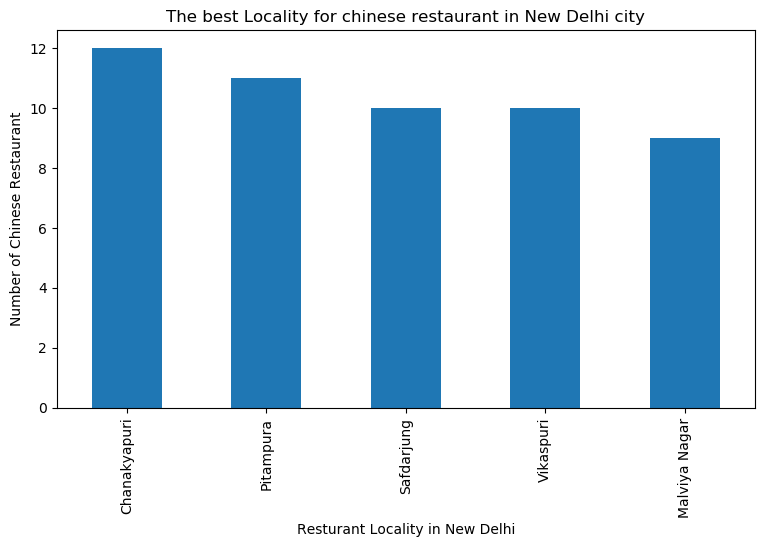

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Chinese Restaurant')

#displays the plot
plt.show()


ANSWER: THE BEST LOCALITY FOR CHINESE RESTAURANT IS CHANAKYAPURI

6) WHAT ARE THE BEST PLACE FOR CHINESE RESTAURANTS IN NEW DELHI?

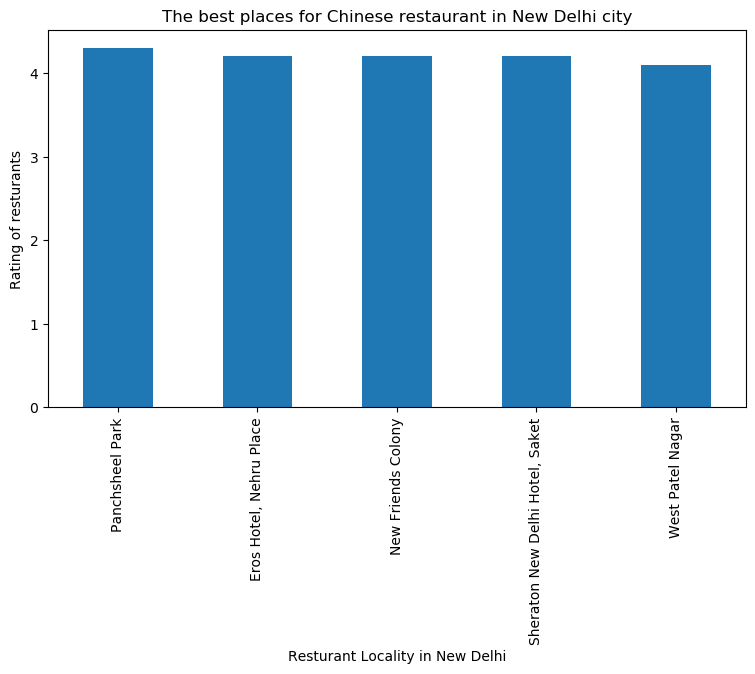

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

ANSWER:THE BEST PLACE FOR CHINESE RESTAURANT IS PANCHSHEEL PARK

DATA TRANSFORMATION

In [16]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [17]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,"ARSS Mall, Paschim Vihar",28.668945,77.101544,1,"North Indian, South Indian, Chinese, Mithai, F...",3.100000,Average,117
1,Adchini,28.537063,77.197808,13,"Fast Food, North Indian, Seafood, Continental,...",3.292308,"Average, Good, Poor, Very Good",1560
2,"Aditya Mega Mall, Karkardooma",28.656131,77.301266,4,"Finger Food, North Indian, Mughlai, Pizza, Fas...",3.275000,"Average, Good",434
3,Aerocity,28.553077,77.104270,2,"Fast Food, Italian, Pizza, North Indian, Conti...",3.200000,Average,59
4,"Aggarwal City Mall, Pitampura",28.690020,77.134650,3,"North Indian, Chinese, Street Food, Mithai, No...",3.033333,Average,126


In [18]:
df_final.shape

(240, 8)

DEFINE FOURSQUARE CREDENTIALS AND VERSION

In [19]:
## Define Foursquare Credentials and Version
CLIENT_ID = 'ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ' # Foursquare ID
CLIENT_SECRET = 'H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ
CLIENT_SECRET:H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW


CREATE A FUNCTION TO REPEAT THE SAME PROCESS TO ALL THE LOCALITY IN NEW DELHI

In [20]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

FIND THE VENUE IN THE NEW DELHI REGION

In [21]:
# find the venues in all New Delhi Locality
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [22]:
new_Delhi_venues.head()

,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"ARSS Mall, Paschim Vihar",28.668945,77.101544,Subway,28.669999,77.102546,Sandwich Place
1,"ARSS Mall, Paschim Vihar",28.668945,77.101544,Baljeet's Amritsari Koolcha,28.665768,77.100481,Indian Restaurant
2,"ARSS Mall, Paschim Vihar",28.668945,77.101544,Pizza Hut,28.670321,77.103853,Pizza Place
3,"ARSS Mall, Paschim Vihar",28.668945,77.101544,Café Coffee Day,28.670009,77.102480,Coffee Shop
4,"ARSS Mall, Paschim Vihar",28.668945,77.101544,Little Chef,28.670000,77.101459,Chinese Restaurant


In [23]:
new_Delhi_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
"ARSS Mall, Paschim Vihar",9,9,9,9,9,9
Adchini,7,7,7,7,7,7
"Aditya Mega Mall, Karkardooma",10,10,10,10,10,10
Aerocity,7,7,7,7,7,7
"Aggarwal City Mall, Pitampura",4,4,4,4,4,4
...,...,...,...,...,...,...
"West Gate Mall, Rajouri Garden",16,16,16,16,16,16
West Patel Nagar,4,4,4,4,4,4
"Worldmark 1, Aerocity",31,31,31,31,31,31


In [24]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 215 uniques categories.


In [25]:

## Analyze Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

,Locality,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Trail,Train Station,Turkish Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wings Joint,Women's Store
0,"ARSS Mall, Paschim Vihar",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"ARSS Mall, Paschim Vihar",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"ARSS Mall, Paschim Vihar",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"ARSS Mall, Paschim Vihar",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"ARSS Mall, Paschim Vihar",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

,Locality,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Trail,Train Station,Turkish Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wings Joint,Women's Store
0,"ARSS Mall, Paschim Vihar",0.111111,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Adchini,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Aditya Mega Mall, Karkardooma",0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aerocity,0.000000,0.000000,0.0,0.0,0.0,0.142857,0.0,0.142857,0.0000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Aggarwal City Mall, Pitampura",0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,"West Gate Mall, Rajouri Garden",0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0625,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236,West Patel Nagar,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
237,"Worldmark 1, Aerocity",0.000000,0.032258,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0000,...,0.0,0.032258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
238,Yusuf Sarai,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
New_Delhi_grouped.shape

(240, 216)

In [28]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
                venue  freq
0   Indian Restaurant  0.22
1                 ATM  0.11
2              Market  0.11
3         Coffee Shop  0.11
4  Chinese Restaurant  0.11


----Adchini----
               venue  freq
0  Indian Restaurant  0.29
1                Pub  0.29
2               Café  0.29
3        Coffee Shop  0.14
4                ATM  0.00


----Aditya Mega Mall, Karkardooma----
               venue  freq
0        Pizza Place   0.2
1  Indian Restaurant   0.2
2      Shopping Mall   0.2
3          Multiplex   0.2
4              Hotel   0.1


----Aerocity----
                  venue  freq
0                 Hotel  0.29
1  Fast Food Restaurant  0.14
2           Coffee Shop  0.14
3        Airport Lounge  0.14
4      Airport Terminal  0.14


----Aggarwal City Mall, Pitampura----
                venue  freq
0    Department Store  0.25
1         Pizza Place  0.25
2    Business Service  0.25
3  Chinese Restaurant  0.25
4            Pharmacy  0.00


----Agga

In [29]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"ARSS Mall, Paschim Vihar",Indian Restaurant,Sandwich Place,Market,Multicuisine Indian Restaurant,Pizza Place,Coffee Shop,Chinese Restaurant,ATM,Airport Terminal,Fast Food Restaurant
1,Adchini,Indian Restaurant,Café,Pub,Coffee Shop,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market
2,"Aditya Mega Mall, Karkardooma",Pizza Place,Indian Restaurant,Shopping Mall,Multiplex,Hotel,Café,Event Space,Food & Drink Shop,Food,Flower Shop
3,Aerocity,Hotel,Airport Terminal,Rental Car Location,Fast Food Restaurant,Airport Lounge,Coffee Shop,Flea Market,Farmers Market,Fish & Chips Shop,Women's Store
4,"Aggarwal City Mall, Pitampura",Pizza Place,Department Store,Business Service,Chinese Restaurant,Falafel Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop
...,...,...,...,...,...,...,...,...,...,...,...
235,"West Gate Mall, Rajouri Garden",Fast Food Restaurant,Restaurant,Café,Multiplex,Shopping Mall,Chinese Restaurant,Garden,Indian Restaurant,Hookah Bar,Pizza Place
236,West Patel Nagar,Pizza Place,Juice Bar,Metro Station,Dance Studio,Dessert Shop,Dim Sum Restaurant,French Restaurant,Food Truck,Food Court,Food & Drink Shop
237,"Worldmark 1, Aerocity",Hotel,Indian Restaurant,Coffee Shop,Bed & Breakfast,Hotel Bar,Athletics & Sports,North Indian Restaurant,Punjabi Restaurant,Restaurant,Café
238,Yusuf Sarai,Indian Restaurant,Coffee Shop,Korean Restaurant,Ice Cream Shop,Park,Hotel,Japanese Restaurant,Bar,Café,Asian Restaurant


In [31]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(240,)

In [32]:
# add clustering labels
New_Delhi_merged = df_final.head(240)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"ARSS Mall, Paschim Vihar",28.668945,77.101544,1,"North Indian, South Indian, Chinese, Mithai, F...",3.100000,Average,117,0,Indian Restaurant,Sandwich Place,Market,Multicuisine Indian Restaurant,Pizza Place,Coffee Shop,Chinese Restaurant,ATM,Airport Terminal,Fast Food Restaurant
1,Adchini,28.537063,77.197808,13,"Fast Food, North Indian, Seafood, Continental,...",3.292308,"Average, Good, Poor, Very Good",1560,0,Indian Restaurant,Café,Pub,Coffee Shop,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market
2,"Aditya Mega Mall, Karkardooma",28.656131,77.301266,4,"Finger Food, North Indian, Mughlai, Pizza, Fas...",3.275000,"Average, Good",434,0,Pizza Place,Indian Restaurant,Shopping Mall,Multiplex,Hotel,Café,Event Space,Food & Drink Shop,Food,Flower Shop
3,Aerocity,28.553077,77.104270,2,"Fast Food, Italian, Pizza, North Indian, Conti...",3.200000,Average,59,1,Hotel,Airport Terminal,Rental Car Location,Fast Food Restaurant,Airport Lounge,Coffee Shop,Flea Market,Farmers Market,Fish & Chips Shop,Women's Store
4,"Aggarwal City Mall, Pitampura",28.690020,77.134650,3,"North Indian, Chinese, Street Food, Mithai, No...",3.033333,Average,126,4,Pizza Place,Department Store,Business Service,Chinese Restaurant,Falafel Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop


CREATING FINAL MAP

In [ ]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

NOTE:THE MAP MAY NOT BE VISIBLE IN THE GITHUB REPOSITORY

In [34]:
## Examine Clusters

## Cluster 1
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,28.668945,3.100000,Average,117,0,Indian Restaurant,Sandwich Place,Market,Multicuisine Indian Restaurant,Pizza Place,Coffee Shop,Chinese Restaurant,ATM,Airport Terminal,Fast Food Restaurant
1,28.537063,3.292308,"Average, Good, Poor, Very Good",1560,0,Indian Restaurant,Café,Pub,Coffee Shop,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market
2,28.656131,3.275000,"Average, Good",434,0,Pizza Place,Indian Restaurant,Shopping Mall,Multiplex,Hotel,Café,Event Space,Food & Drink Shop,Food,Flower Shop
16,28.630440,3.208333,"Average, Good, Poor",1779,0,Indian Restaurant,Café,Bakery,Hotel,Theater,Nightclub,Arcade,Art Gallery,Fast Food Restaurant,Fish & Chips Shop
23,28.656414,3.358182,"Average, Good, Very Good",6668,0,Indian Restaurant,Snack Place,Market,Dessert Shop,Train Station,Restaurant,Jewelry Store,Light Rail Station,Paper / Office Supplies Store,Food
32,28.718351,3.150000,"Average, Good",494,0,Indian Restaurant,Food Court,Clothing Store,Pharmacy,Falafel Restaurant,French Restaurant,Food Truck,Food & Drink Shop,Food,Flower Shop
33,28.657388,3.320000,"Average, Good",636,0,Pizza Place,Indian Restaurant,Hotel,Multiplex,Deli / Bodega,Falafel Restaurant,Food Truck,Food Court,Food & Drink Shop,Food
42,28.576161,2.983333,"Average, Good, Poor",542,0,Indian Restaurant,Fast Food Restaurant,Shopping Mall,Market,Dessert Shop,Pizza Place,Restaurant,Women's Store,Airport Terminal,Farmers Market
43,28.643320,3.287500,"Average, Good, Poor, Very Good",2570,0,Indian Restaurant,Restaurant,Hotel,Hostel,Asian Restaurant,Movie Theater,Road,Food & Drink Shop,Food,Flower Shop
47,28.681582,3.046875,"Average, Good, Poor",1224,0,Indian Restaurant,Afghan Restaurant,Flower Shop,Clothing Store,Falafel Restaurant,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food


In [35]:
## Examine Clusters

## Cluster 2
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,28.553077,3.200000,Average,59,1,Hotel,Airport Terminal,Rental Car Location,Fast Food Restaurant,Airport Lounge,Coffee Shop,Flea Market,Farmers Market,Fish & Chips Shop,Women's Store
10,28.554807,3.000000,Average,4,1,Hotel,Coffee Shop,Indian Restaurant,Punjabi Restaurant,Restaurant,Bed & Breakfast,Gym,Athletics & Sports,Gastropub,Multicuisine Indian Restaurant
12,28.641698,3.050000,Average,17,1,Indian Restaurant,Hotel,Movie Theater,Hostel,Event Space,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop
19,28.548827,2.700000,Average,9,1,Hotel,Italian Restaurant,Bed & Breakfast,Hotel Bar,Indian Restaurant,Buffet,Accessories Store,Food Truck,French Restaurant,Farmers Market
20,28.568193,2.755556,"Average, Poor",339,1,Lounge,Hotel,Chinese Restaurant,Café,Gym / Fitness Center,Italian Restaurant,Breakfast Spot,Asian Restaurant,Bakery,Fish & Chips Shop
25,28.495624,2.700000,Average,23,1,Light Rail Station,Indian Restaurant,Japanese Restaurant,Hotel,Donut Shop,Event Space,Food Truck,Food Court,Food & Drink Shop,Food
35,28.590297,3.350000,"Average, Good",127,1,Hotel,Pizza Place,American Restaurant,Indian Restaurant,Restaurant,Liquor Store,Asian Restaurant,Arcade,Department Store,Hookah Bar
56,28.570246,4.050000,"Average, Excellent",1949,1,Hotel,Neighborhood,Gym,Sculpture Garden,Café,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop
60,28.665829,4.000000,Very Good,756,1,Hotel,Indian Restaurant,BBQ Joint,Café,Asian Restaurant,Diner,Dim Sum Restaurant,French Restaurant,Food Truck,Food Court
69,28.550327,3.300000,Average,30,1,Hotel,Indian Restaurant,Coffee Shop,Bed & Breakfast,Hotel Bar,Athletics & Sports,North Indian Restaurant,Punjabi Restaurant,Restaurant,Café


In [36]:
## Examine Clusters

## Cluster 3
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,28.654105,3.085714,Average,80,2,Pizza Place,Fast Food Restaurant,Event Space,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market
26,28.538688,3.130303,"Average, Good, Poor",2578,2,Fast Food Restaurant,Market,Pizza Place,Park,Café,Indian Restaurant,Hot Dog Joint,Food Court,Food,Flower Shop
94,28.538153,3.117143,"Average, Good, Poor",3642,2,Fast Food Restaurant,Pizza Place,Farmers Market,Indian Restaurant,Dessert Shop,Bank,Market,Sandwich Place,Food Truck,Food Court
104,28.656263,3.097619,"Average, Good",965,2,Pizza Place,Fast Food Restaurant,Event Space,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market
130,28.724100,3.133333,Average,325,2,Pizza Place,Asian Restaurant,Shopping Mall,Fast Food Restaurant,Theme Park,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop
170,28.643757,3.575000,"Average, Good",2879,2,Fast Food Restaurant,Pizza Place,Indian Restaurant,Hotel,Bar,Coffee Shop,Multicuisine Indian Restaurant,Light Rail Station,Falafel Restaurant,Food Court
181,28.571849,3.316667,"Average, Good",472,2,Fast Food Restaurant,Pizza Place,Snack Place,Department Store,Design Studio,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food
219,28.638846,3.048148,"Average, Good",290,2,Fast Food Restaurant,Women's Store,Metro Station,Indian Restaurant,African Restaurant,Airport,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck
231,28.637492,3.062264,"Average, Good, Poor",1253,2,Pizza Place,Beer Garden,Fast Food Restaurant,Indian Restaurant,African Restaurant,Airport,Fried Chicken Joint,French Restaurant,Food Truck,Food Court


In [37]:
## Examine Clusters

## Cluster 4
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
59,28.654883,3.053846,"Average, Good",262,3,Burger Joint,Women's Store,Falafel Restaurant,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market


In [38]:
## Examine Clusters

## Cluster 5
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,28.690020,3.033333,Average,126,4,Pizza Place,Department Store,Business Service,Chinese Restaurant,Falafel Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop
5,28.700516,3.040000,"Average, Good, Poor",594,4,Pizza Place,Salad Place,Fast Food Restaurant,Multiplex,Sandwich Place,Gym / Fitness Center,Food & Drink Shop,Food,Flower Shop,Flea Market
6,28.527088,3.117391,"Average, Good, Poor",1012,4,Food & Drink Shop,Coffee Shop,Steakhouse,Market,Women's Store,Falafel Restaurant,Food Truck,Food Court,Food,Flower Shop
7,28.541298,3.425000,"Average, Good, Very Good",2460,4,Coffee Shop,Café,Clothing Store,Shopping Mall,Italian Restaurant,Asian Restaurant,Fast Food Restaurant,Indian Restaurant,Chinese Restaurant,Portuguese Restaurant
8,28.555599,3.800000,"Average, Very Good",2411,4,Café,Stadium,Other Great Outdoors,Metro Station,Coffee Shop,Golf Course,Music Venue,Hotel,Dessert Shop,Flower Shop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,28.658041,3.400000,Average,19,4,ATM,Café,Park,Dessert Shop,South Indian Restaurant,Burger Joint,Burrito Place,Food Court,Food & Drink Shop,Food
232,28.667344,3.077273,"Average, Good, Poor",939,4,Juice Bar,Mobile Phone Shop,Athletics & Sports,Bed & Breakfast,Gift Shop,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food
233,28.695096,3.050000,Average,86,4,Ice Cream Shop,Women's Store,Event Space,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market
235,28.652978,3.500000,Good,178,4,Fast Food Restaurant,Restaurant,Café,Multiplex,Shopping Mall,Chinese Restaurant,Garden,Indian Restaurant,Hookah Bar,Pizza Place


CONCLUSION

THE BEST RATED RESTAURANTS ARE AVAILABLE IN KASBAH, GREATER KAILASH(GK).

THE WORST RATED RESTAURANTS IN DELHI ARE IN PICCADILY HOTEL, JANAKPURI.

THE HIGHEST NUMBER OF RESTAURANTS ARE AVAILABLE IN CONNAUGHT PLACE.

THE LOWEST NUMBER OF RESTAURANTS ARE AVAILABLE IN .

THE BEST LOCALITY FOR CHINESE RESTAURANT IS CHANAKYAPURI.

THE BEST PLACE FOR CHINESE RESTAURANT IS PANCHSHEEL PARK.